# Read Dataset and Import Libraties

In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xg 
import tensorflow as tf 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing. sequence import TimeseriesGenerator

import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/scr-dataset/scr-dataset.csv


In [46]:
data = pd.read_csv('/kaggle/input/scr-dataset/scr-dataset.csv')

# Data Cleaning and EDA

In [47]:
data.head()

,x,y
0,1.0,1.750768
1,1.1,1.699704
2,1.2,1.607502
3,1.3,1.479060
4,1.4,1.320438


In [48]:
data.shape

(440, 2)

In [49]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [50]:
data = data.drop_duplicates()

In [51]:
data.shape

(440, 2)

In [52]:
data.describe()

,x,y
count,440.000000,440.000000
mean,22.950000,0.000708
std,12.716131,1.001561
min,1.000000,-1.760149
25%,11.975000,-0.571808
50%,22.950000,-0.002649
75%,33.925000,0.592413
max,44.900000,1.760160


# Visualization

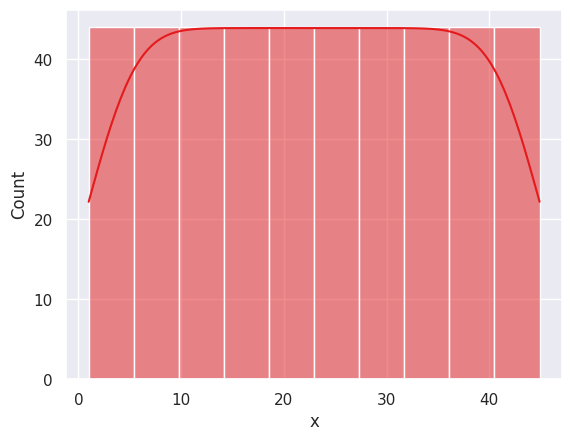

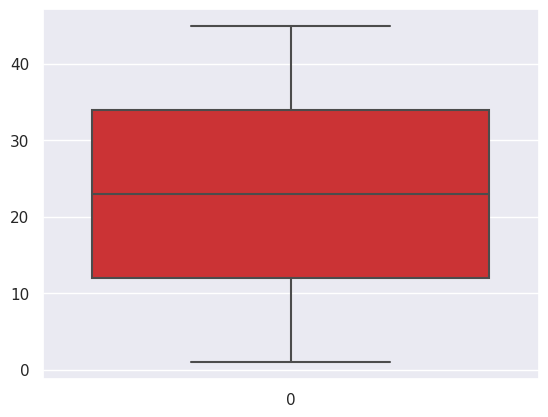

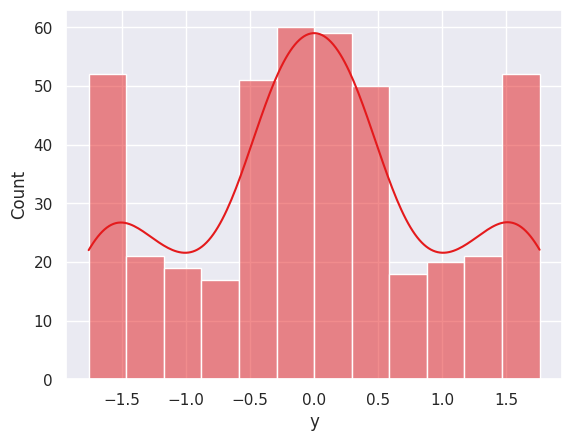

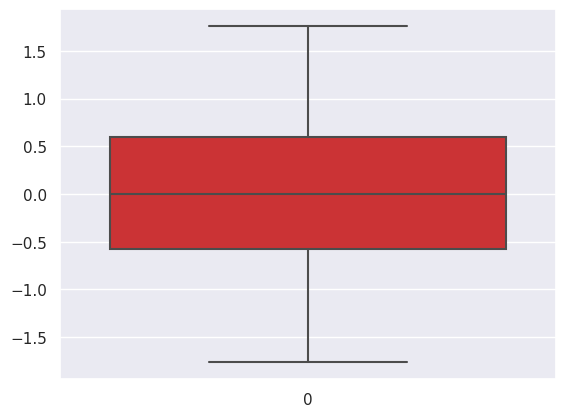

In [53]:
numaric = ['x','y']
for num in numaric:
    sns.histplot(data[num], kde=True)
    plt.show()
    sns.boxplot(data[num])
    plt.show()

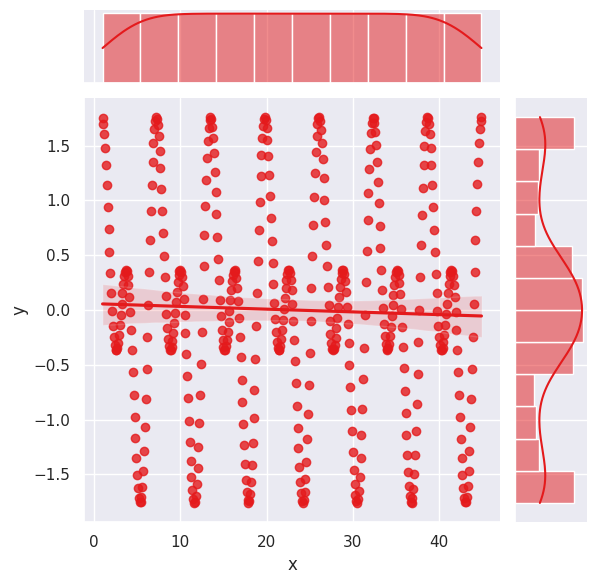

In [54]:
sns.set(style='darkgrid',palette='Set1')
sns.jointplot(x='x',y='y',data=data,kind = 'reg')
plt.show()

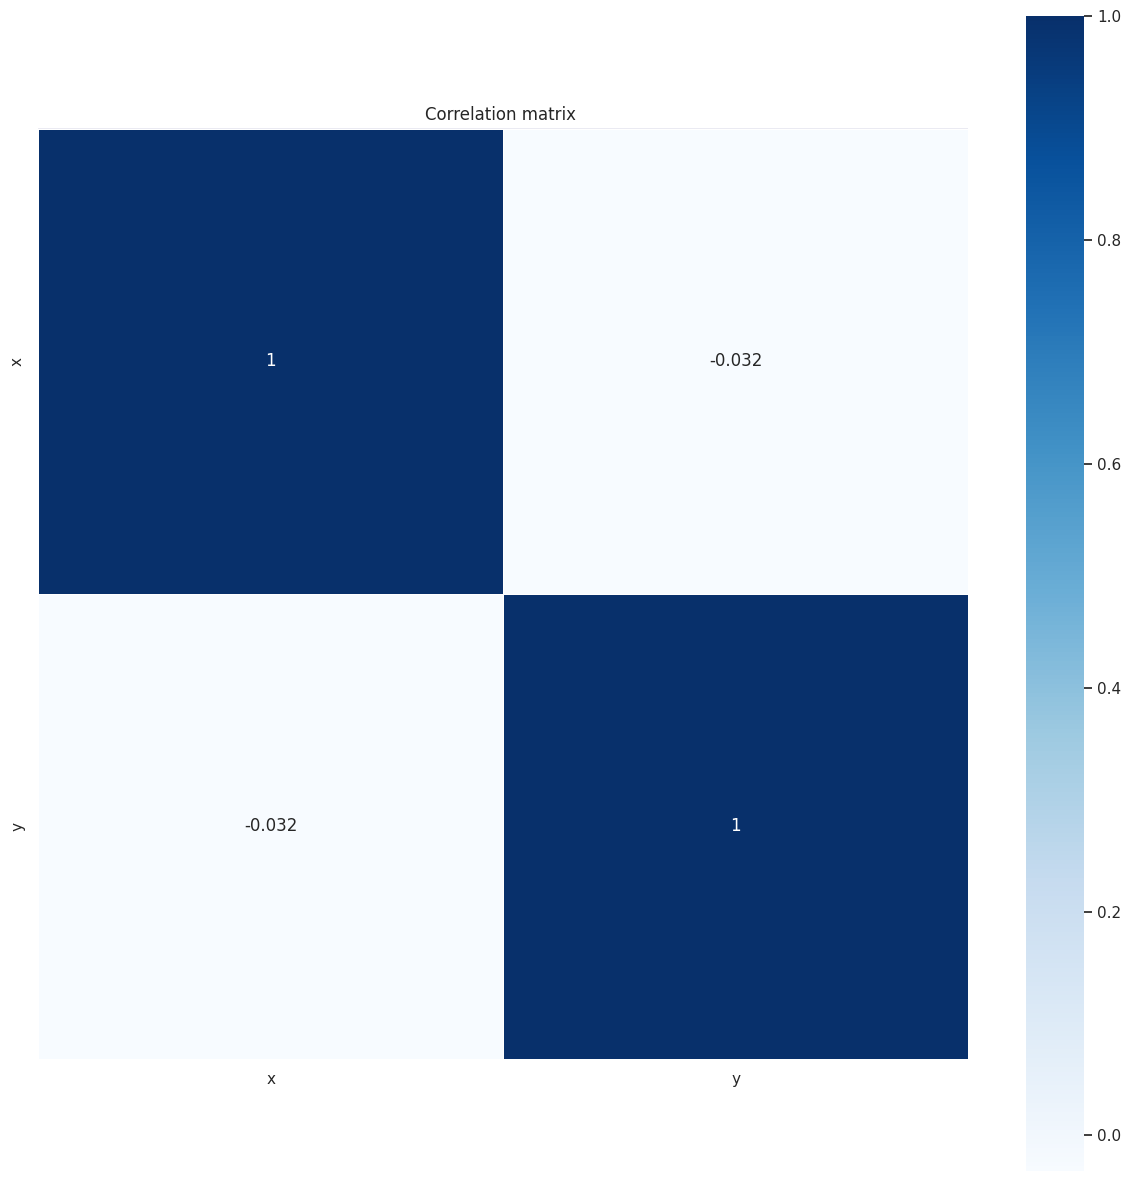

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(data[['x','y']].corr(), square=True, cmap='Blues',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')

plt.show()

# Baseline Experiment

## Train-Test Split

Although through EDA we got to know that it is some sort of a sequential dataset where x represents something resembling to a time unit and y is some wave function, I used this Train-Test Split just to establish a baseline with Traditional ML models.

In [57]:
X=data.drop(['y'],axis=1)
X = pd.DataFrame(X)
Y=data['y']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 123)

In [59]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_test_pred = LR_model.predict(X_test)

In [61]:
print(r2_score(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))
print(mean_squared_error(y_test, y_test_pred))
print(mean_absolute_percentage_error(y_test, y_test_pred))

-0.022418262646612508
0.7245774989235596
0.8649406907499143
1.2626971529674333


In [62]:
SVM_model = SVR()
SVM_model.fit(X_train, y_train)

SVR()

In [63]:
y_test_pred = SVM_model.predict(X_test)

In [64]:
print(r2_score(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))
print(mean_squared_error(y_test, y_test_pred))
print(mean_absolute_percentage_error(y_test, y_test_pred))

-0.026889083140121617
0.7249836844479987
0.868722894870432
1.3184819663185168


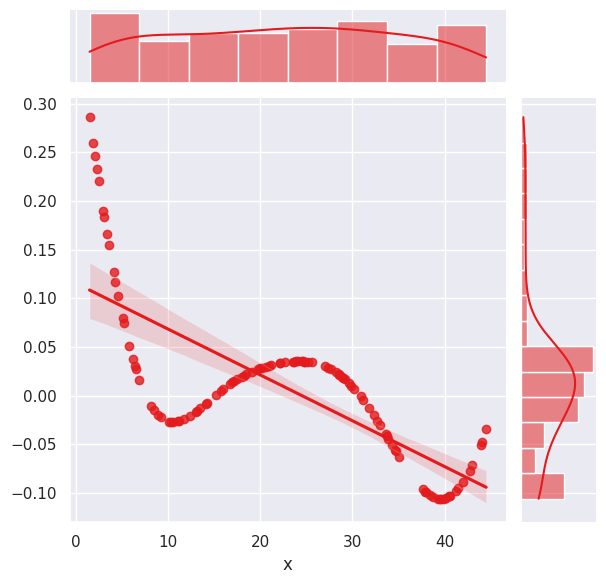

In [65]:
sns.set(style='darkgrid',palette='Set1')
sns.jointplot(x=X_test['x'],y=y_test_pred,kind = 'reg')
plt.show()

## TimeSeriesSplit

In [370]:
tss = TimeSeriesSplit(n_splits=8)

In [371]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

In [68]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [69]:
y_test_pred = LR_model.predict(X_test)

In [70]:
print(r2_score(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))
print(mean_squared_error(y_test, y_test_pred))
print(mean_absolute_percentage_error(y_test, y_test_pred))

-0.05510081104582798
0.9022906122721096
1.1879793315782385
1.0099712235857023


In [71]:
SVM_model = SVR()
SVM_model.fit(X_train, y_train)

SVR()

In [72]:
y_test_pred = SVM_model.predict(X_test)

In [73]:
print(r2_score(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))
print(mean_squared_error(y_test, y_test_pred))
print(mean_absolute_percentage_error(y_test, y_test_pred))

-0.02983507330776236
0.8998285127235217
1.1595316477970588
1.0428511880448477


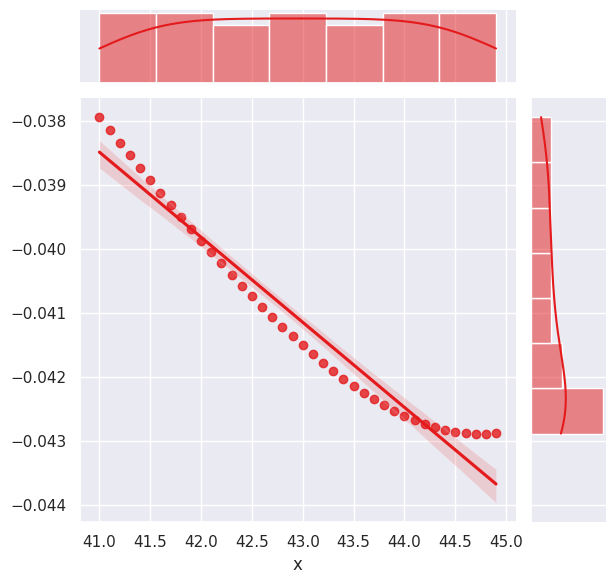

In [74]:
sns.set(style='darkgrid',palette='Set1')
sns.jointplot(x=X_test['x'],y=y_test_pred,kind = 'reg')
plt.show()

In [75]:
xgb_r = xg.XGBRegressor()
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [76]:
y_test_pred = xgb_r.predict(X_test)

In [77]:
print(r2_score(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))
print(mean_squared_error(y_test, y_test_pred))
print(mean_absolute_percentage_error(y_test, y_test_pred))

-0.030073296659524074
0.9000978296857609
1.1597998728000438
1.0423838719153324


In [78]:
reg_model = MLPRegressor(hidden_layer_sizes = (6,32), activation = "relu")
reg_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(6, 32))

In [79]:
y_test_pred = reg_model.predict(X_test)

In [80]:
print(r2_score(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))
print(mean_squared_error(y_test, y_test_pred))
print(mean_absolute_percentage_error(y_test, y_test_pred))

-0.042398083982984724
0.9230000963585496
1.173676833610884
2.0169990707654315


# Deep Learning

## MinMaxScaler

In [372]:
scaler = MinMaxScaler()

In [373]:
scaler.fit(y_train.values.reshape(-1,1))

MinMaxScaler()

In [374]:
scaled_ytrain = scaler.transform(y_train.values.reshape(-1,1))
scaled_ytest= scaler.transform(y_test.values.reshape(-1,1))

## TimeseriesGenerator

In [375]:
length = 50
batch_size = 1
generator = TimeseriesGenerator(scaled_ytrain, scaled_ytrain,
                                length=length, batch_size=batch_size)

In [376]:
x,y = generator[0]
y

array([[0.26820388]])

In [377]:
scaled_ytrain[50]

array([0.26820388])

## Model Building 

### RNN

In [378]:
n_features = 1
model = Sequential()
model.add(SimpleRNN(128,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [379]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 128)               16640     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 16769 (65.50 KB)
Trainable params: 16769 (65.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [380]:
model.fit_generator(generator, epochs=10)

Epoch 1/10
342/342 [==============================] - 4s 9ms/step - loss: 0.0063
Epoch 2/10
342/342 [==============================] - 3s 9ms/step - loss: 2.3157e-04
Epoch 3/10
342/342 [==============================] - 3s 9ms/step - loss: 0.0010
Epoch 4/10
342/342 [==============================] - 3s 9ms/step - loss: 1.1357e-04
Epoch 5/10
342/342 [==============================] - 3s 9ms/step - loss: 6.1651e-05
Epoch 6/10
342/342 [==============================] - 3s 9ms/step - loss: 2.6785e-05
Epoch 7/10
342/342 [==============================] - 3s 9ms/step - loss: 5.3561e-05
Epoch 8/10
342/342 [==============================] - 3s 9ms/step - loss: 5.9471e-05
Epoch 9/10
342/342 [==============================] - 3s 9ms/step - loss: 5.8196e-04
Epoch 10/10
342/342 [==============================] - 3s 9ms/step - loss: 1.9631e-05


<Axes: >

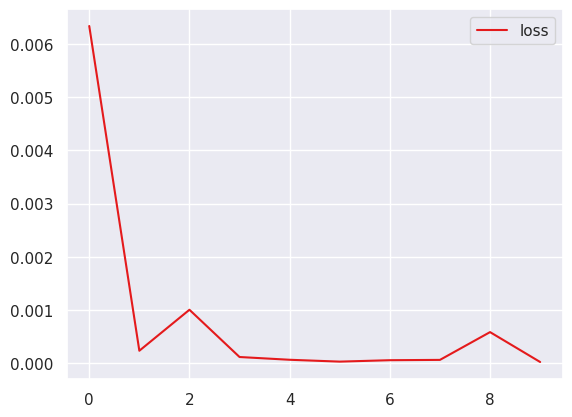

In [381]:
losses = pd.DataFrame (model.history.history)
losses.plot()

In [382]:
first_eval_batch = scaled_ytrain[-length:]
first_eval_batch = first_eval_batch.reshape((1, length, n_features))
model.predict (first_eval_batch)

1/1 [==============================] - 0s 163ms/step


array([[0.3932071]], dtype=float32)

In [383]:
scaled_ytest[0]

array([0.3975476])

In [439]:
test_predictions = []
first_eval_batch = scaled_ytrain[-length:]
current_batch = first_eval_batch.reshape((1,length, n_features))

for i in range(len(X_test)):
    current_pred = model.predict(current_batch) [0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

1/1 [==============================] - 0s 24ms/step


In [387]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[-0.3759384 ],
       [-0.38884527],
       [-0.38047549],
       [-0.34647411],
       [-0.29274502],
       [-0.22806486],
       [-0.15348413],
       [-0.07922213],
       [-0.00718649],
       [ 0.05452158],
       [ 0.09935233],
       [ 0.12648734],
       [ 0.12696952],
       [ 0.1019076 ],
       [ 0.0496366 ],
       [-0.03274434],
       [-0.14055208],
       [-0.27448589],
       [-0.4285617 ],
       [-0.60069532],
       [-0.78445365],
       [-0.97287832],
       [-1.16137003],
       [-1.34073545],
       [-1.50569766],
       [-1.64929952],
       [-1.76448464],
       [-1.84775786],
       [-1.89353822],
       [-1.8996075 ],
       [-1.86388975],
       [-1.78563116],
       [-1.66732745],
       [-1.50872412],
       [-1.3154856 ],
       [-1.09034366],
       [-0.83962949],
       [-0.56982696],
       [-0.28769312],
       [-0.00211351],
       [ 0.27969951],
       [ 0.54869284],
       [ 0.79702894],
       [ 1.01842327],
       [ 1.20575516],
       [ 1

In [388]:
print(r2_score(y_test, true_predictions))
print(mean_absolute_error(y_test, true_predictions))
print(mean_squared_error(y_test, true_predictions))
print(mean_absolute_percentage_error(y_test, true_predictions))

0.9446113239468202
0.20959354380933648
0.052178205207232875
0.9398549614281492


#### Visualizing Results

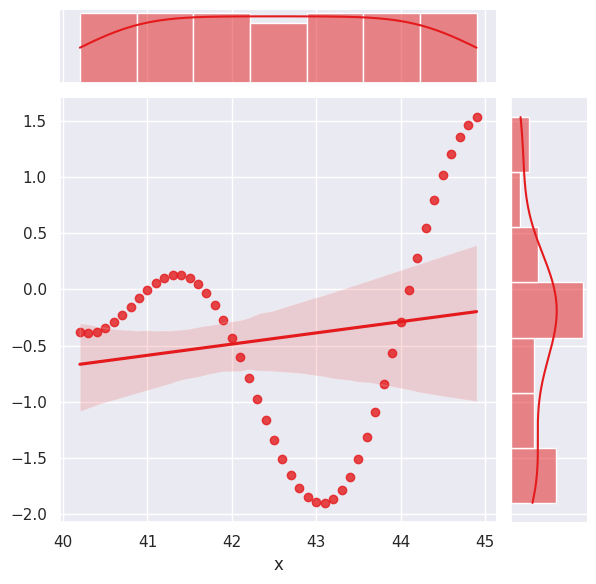

In [389]:
sns.set(style='darkgrid',palette='Set1')
sns.jointplot(x=X_test['x'],y=true_predictions.reshape(-1,),kind = 'reg')
plt.show()

In [390]:
test = pd.DataFrame()

In [391]:
test['y_test'] = y_test

In [392]:
test['true_predictions'] = true_predictions

<Axes: >

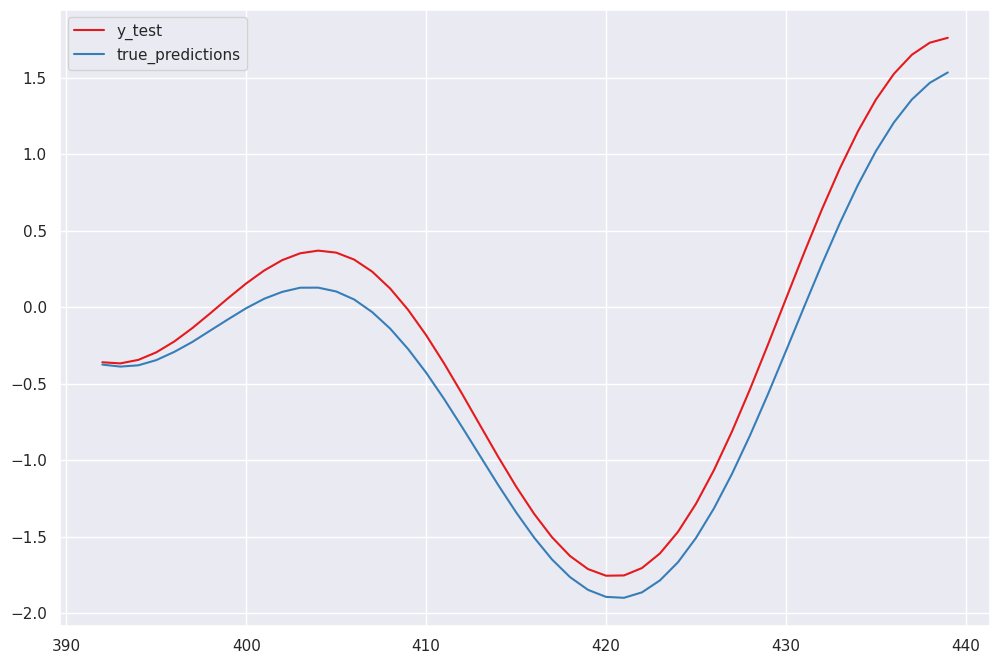

In [393]:
test.plot(figsize=(12,8))

### LSTM

In [394]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor= 'val_loss', patience=2)

In [396]:
length = 46
generator = TimeseriesGenerator(scaled_ytrain, scaled_ytrain,
                                length=length, batch_size=1)
validation_generator = TimeseriesGenerator(scaled_ytest, scaled_ytest,
                                           length=length, batch_size=1)

In [434]:
model = Sequential()
model.add(LSTM(64, input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [435]:
model.fit_generator(generator, epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/20
346/346 [==============================] - 9s 20ms/step - loss: 0.0267 - val_loss: 6.9591e-06
Epoch 2/20
346/346 [==============================] - 6s 18ms/step - loss: 0.0013 - val_loss: 5.2726e-04
Epoch 3/20
346/346 [==============================] - 6s 18ms/step - loss: 1.3769e-04 - val_loss: 6.4574e-05


In [436]:
test_predictions = []
first_eval_batch = scaled_ytrain[-length:]
current_batch = first_eval_batch.reshape((1,length, n_features))

for i in range(len(X_test)):
    current_pred = model.predict(current_batch) [0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

1/1 [==============================] - 0s 24ms/step


#### Visualizing Results

<Axes: >

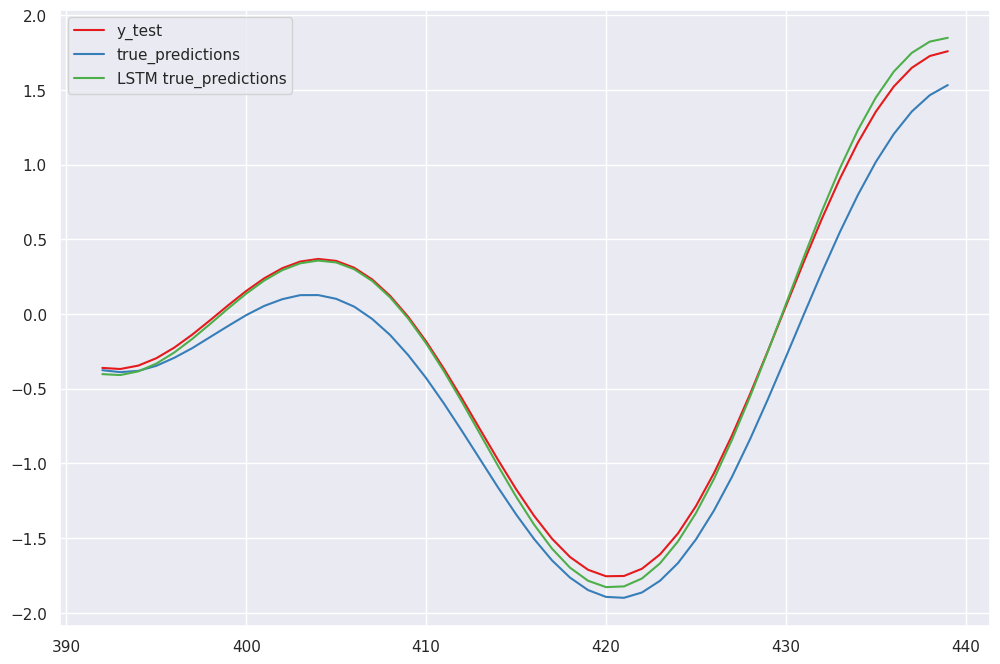

In [437]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM true_predictions'] = true_predictions
test.plot(figsize=(12,8))

In [438]:
print(r2_score(y_test, true_predictions))
print(mean_absolute_error(y_test, true_predictions))
print(mean_squared_error(y_test, true_predictions))
print(mean_absolute_percentage_error(y_test, true_predictions))

0.9972884429835993
0.04196211607123981
0.0025543881622486515
0.09439016116178782


# Final Model

## MinMaxScaler + LSTM

In [608]:
full_scaler = MinMaxScaler()
scaled_fulldata = full_scaler.fit_transform(data['y'].values.reshape(-1, 1))

In [619]:
length = 46
generator = TimeseriesGenerator(scaled_fulldata, scaled_fulldata,
                                length=length, batch_size=1)

In [620]:
model = Sequential()
model.add(LSTM(64, input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [621]:
model.fit_generator(generator,epochs=3)

Epoch 1/3
394/394 [==============================] - 10s 18ms/step - loss: 0.0174
Epoch 2/3
394/394 [==============================] - 7s 18ms/step - loss: 0.0018
Epoch 3/3
394/394 [==============================] - 7s 18ms/step - loss: 3.4088e-04


# Forcasting

In [649]:
forecast = []
first_eval_batch = scaled_fulldata[-length:]
current_batch = first_eval_batch.reshape((1,length, n_features))

for i in range(50):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

1/1 [==============================] - 0s 24ms/step


In [650]:
forecast = full_scaler.inverse_transform(forecast)

In [652]:
forecast_index = np.arange(45.0,50,step=0.1)

In [653]:
forecast_index

array([45. , 45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46. ,
       46.1, 46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47. , 47.1,
       47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48. , 48.1, 48.2,
       48.3, 48.4, 48.5, 48.6, 48.7, 48.8, 48.9, 49. , 49.1, 49.2, 49.3,
       49.4, 49.5, 49.6, 49.7, 49.8, 49.9])

In [654]:
forecast

array([[ 1.72920964],
       [ 1.66285905],
       [ 1.55609436],
       [ 1.41430894],
       [ 1.24376592],
       [ 1.05144287],
       [ 0.84483398],
       [ 0.63174396],
       [ 0.42005832],
       [ 0.21748293],
       [ 0.03125158],
       [-0.13219101],
       [-0.26749897],
       [-0.37070396],
       [-0.43941499],
       [-0.47292864],
       [-0.47222204],
       [-0.4398508 ],
       [-0.37976837],
       [-0.29710123],
       [-0.19790645],
       [-0.0889264 ],
       [ 0.02267029],
       [ 0.12956361],
       [ 0.22459228],
       [ 0.30108212],
       [ 0.35317435],
       [ 0.37611324],
       [ 0.36647506],
       [ 0.32230883],
       [ 0.24320895],
       [ 0.13032843],
       [-0.01364139],
       [-0.18451846],
       [-0.3767048 ],
       [-0.58332502],
       [-0.79644431],
       [-1.00739949],
       [-1.20722783],
       [-1.38716084],
       [-1.53911892],
       [-1.65613654],
       [-1.73266772],
       [-1.76474818],
       [-1.75002903],
       [-1

## Visualizing Forcast

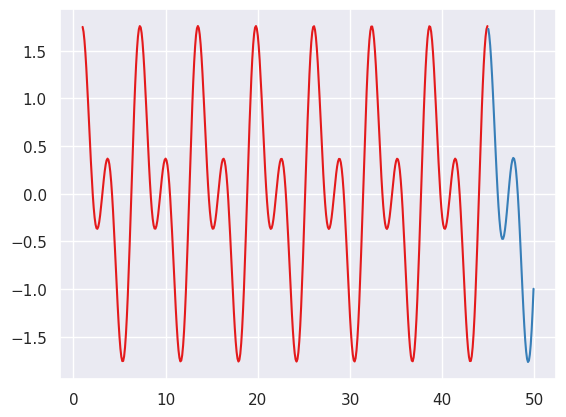

In [655]:
plt.plot(data.x,data.y)
plt.plot(forecast_index,forecast)

In [692]:
Forcast = pd.DataFrame()

In [693]:
Forcast['x'] = forecast_index

In [694]:
Forcast['y'] = forecast

In [695]:
Forcast

,x,y
0,45.0,1.729210
1,45.1,1.662859
2,45.2,1.556094
3,45.3,1.414309
4,45.4,1.243766
5,45.5,1.051443
6,45.6,0.844834
7,45.7,0.631744
8,45.8,0.420058
9,45.9,0.217483


### Prediction For x = 50.0

In [696]:
x50=model.predict(current_batch)[0]

1/1 [==============================] - 0s 24ms/step


In [697]:
x50 = full_scaler.inverse_transform(x50.reshape(-1, 1))

In [703]:
float(x50)

-0.7329668402671814

In [699]:
Forcast.loc[len(Forcast.index)] =[50.0,float(x50)]

## Forcast for x = 45 to 50 csv

In [702]:
Forcast.to_csv('Forcast.csv')